# Data Analysis

Notebook to convert all electric currents from time domain to frequency domain, by Fourier Transform, and analyse and visualize those currents.

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
dataset = pd.read_csv('../TimeDomain/ElectricCurrentDataset.txt')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Device
0,0.0,1.66,1.84,2.09,1.66,1.24,0.71,0.00,0.60,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
1,0.0,1.31,1.13,1.59,1.74,1.56,1.35,1.03,0.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
2,0.0,0.96,1.74,1.70,2.02,1.66,1.06,0.53,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
3,0.0,1.24,2.27,2.02,1.95,1.56,1.13,0.67,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
4,0.0,1.70,1.77,1.98,1.81,1.13,0.78,0.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook


## Combinações de Correntes

In [15]:
classes=[]
for i in dataset['Device']:
    if i not in classes:
        classes.append(i)

#Transformando o Dataframe dataset em matriz
matrix_dataset = list(dataset.as_matrix())

#Transformando cada linha da matriz em um numpy array
for i in range(len(matrix_dataset)):
    matrix_dataset[i] = np.asarray(matrix_dataset[i])

#Dois a dois
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        if i+(200*j)<len(dataset):
            matrix_dataset.append(matrix_dataset[i]+matrix_dataset[i+(200*j)])

#Três a três
num_classes = 4
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        for k in range(1, num_classes):
            if i+(200*j)<len(dataset) and i+(200*(j+num_classes))<len(dataset):
                matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*j)] + matrix_dataset[i+(200*(j+1))])

#Quatro a quatro
for i in range(200):
    matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*1)] + matrix_dataset[i+(200*(2))] + matrix_dataset[i+(200*(3))])

#Novo dataset
new_dataset = pd.DataFrame(matrix_dataset)

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


/Users/jeanlima/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


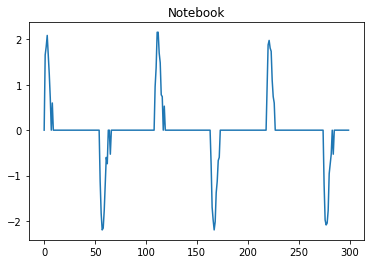

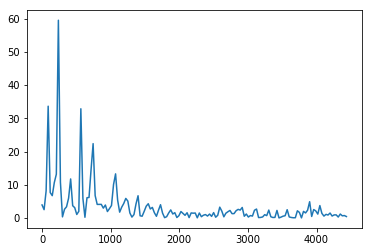

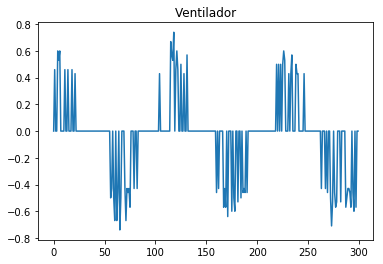

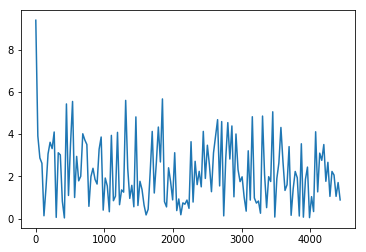

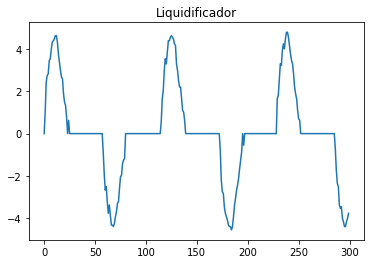

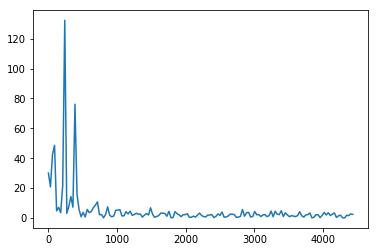

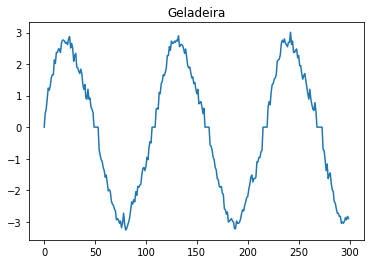

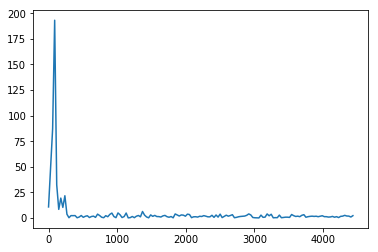

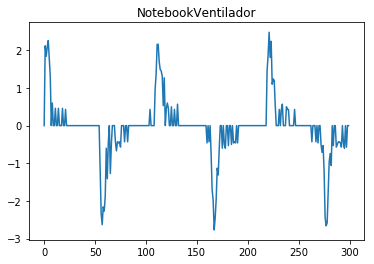

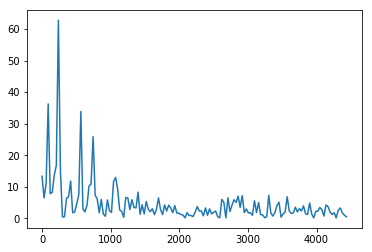

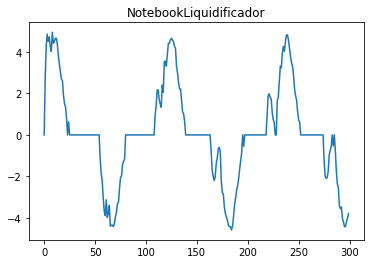

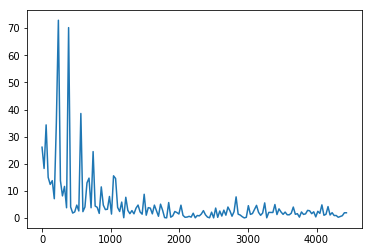

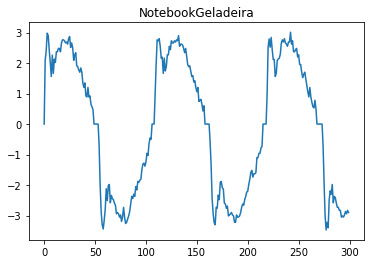

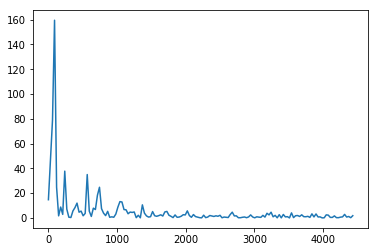

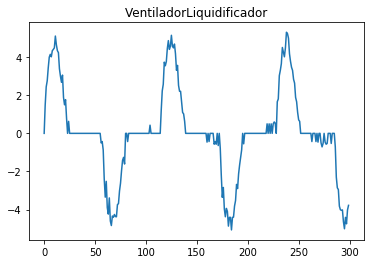

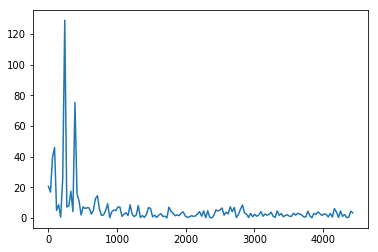

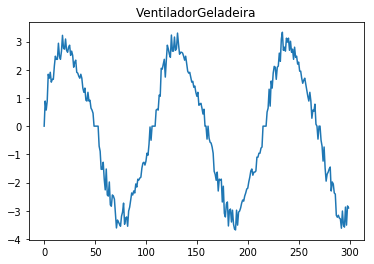

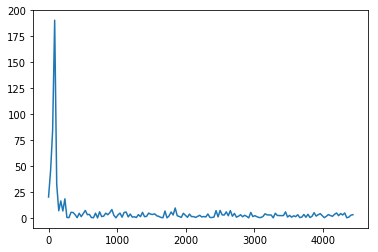

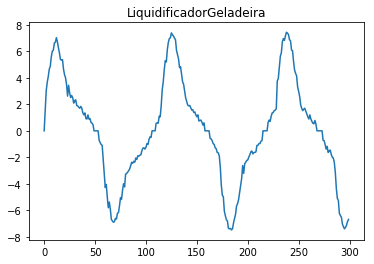

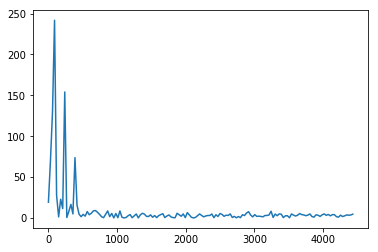

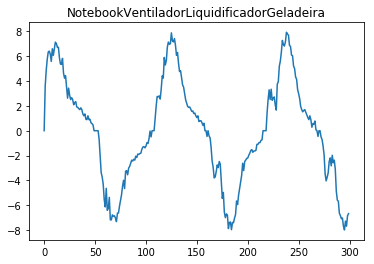

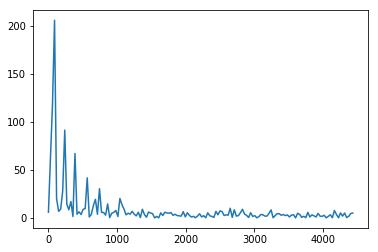

In [53]:
device_position = 300
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)

Fs = 8930.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
n = 300 # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range
        
aux = []
for classe in classes:
    signal = new_dataset[new_dataset[device_position]==classe]
    signal.drop([device_position], axis=1, inplace=True)
    signal = signal.as_matrix()
    if classe not in aux:
        plt.plot(signal[0])
        plt.title(classe)
        aux.append(classe)
        plt.show()
        fft = np.fft.fft(signal[0]).real[0:n//2]
        plt.plot(frq,abs(fft))
        plt.show()
        

## Salvando Dataset - Domínio da Frequência

In [58]:
frequency_dataset = []
for i in range(len(matrix_dataset)):
    signal = []
    signal = list(matrix_dataset[i][:device_position])
    frequency_dataset.append(list(np.fft.fft(signal).real[:n//2]))
    frequency_dataset[i].append(matrix_dataset[i][device_position])
    

#Novo dataset
frequency_dataset = pd.DataFrame(frequency_dataset)
frequency_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,-3.93,-2.513044,-8.163932,33.629912,7.659697,6.725006,10.643506,13.177546,59.482317,-10.749250,...,-1.497488,0.593239,-0.932977,-0.940683,0.296320,-1.193640,-0.655611,-0.741995,-0.446247,Notebook
1,-1.00,-0.191735,-4.678745,23.926314,8.975643,6.839434,8.616491,10.477577,54.968947,-3.580283,...,-2.317958,-1.280038,-2.315763,-1.027259,0.946236,-1.938849,-0.064818,-0.210194,-0.189960,Notebook
2,-3.07,-3.250578,-3.296642,28.901722,7.726107,9.185737,9.997531,13.401718,53.479286,-8.655162,...,1.225842,-4.145182,0.461510,0.606144,0.210474,0.552271,-1.623733,1.159318,1.475801,Notebook
3,-1.94,-0.968233,-4.019366,27.971932,10.626979,7.588198,9.675171,14.644327,55.259634,-3.368294,...,0.416586,1.915158,-0.468523,0.125533,0.763407,0.744472,-0.782016,-2.426701,0.004321,Notebook
4,-4.44,-1.646007,-4.716094,32.419320,8.428120,8.383729,11.016293,12.865954,56.504946,-12.448456,...,-1.055849,1.116572,-1.013087,-0.823712,-0.615774,-0.614480,-0.743137,-2.437276,-1.901127,Notebook


In [61]:
frequency_dataset.to_csv('Dataset.csv', index=False)